# Week 3 SA

Hey Everyone!!
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [ ]:
df = pd.read_csv('emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


## Looking at the data

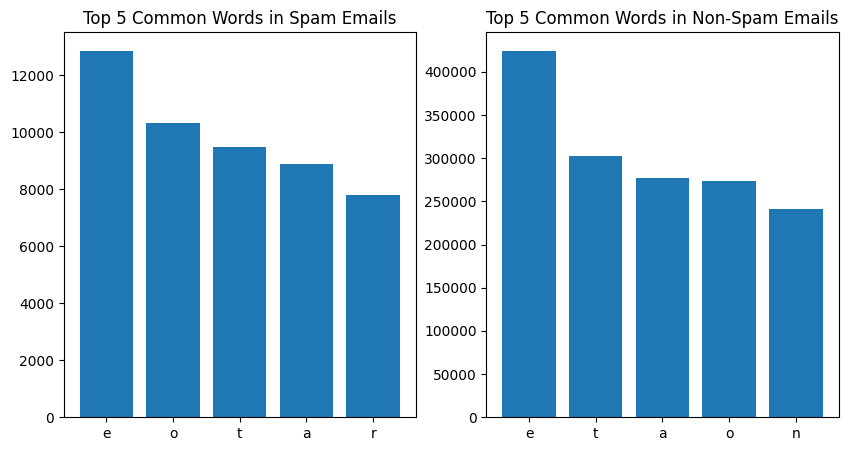

In [ ]:
#plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
spam_df = df[df['spam'] == 1]
non_spam_df = df[df['spam'] == 0]
spam_df = spam_df.select_dtypes(include=['number'])
non_spam_df = non_spam_df.select_dtypes(include=['number'])
top_5_spam_words = spam_df.sum().sort_values(ascending=False).head(5)
top_5_non_spam_words = non_spam_df.sum().sort_values(ascending=False).head(5)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(top_5_spam_words.index, top_5_spam_words.values)
ax[0].set_title('Top 5 Common Words in Spam Emails')
ax[1].bar(top_5_non_spam_words.index, top_5_non_spam_words.values)
ax[1].set_title('Top 5 Common Words in Non-Spam Emails')
plt.show()

## Figuring out some comparatively more important features

In [ ]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset?
# Try taking only top 1.5K that will comprise of some of the most "deciding factors"

dropping = df.drop(['Email No.', 'Prediction'], axis = 1).sum().sort_values(ascending = False)
top_col = dropping.head(1500)

f = df[['Email No.', 'Prediction']+ list(top_col.index)]
f.head()

,Email No.,Prediction,e,t,a,o,n,i,r,s,...,prize,enserch,nothing,become,bellamy,facility,pick,apache,cernosek,features
0,Email 1,0,4,4,2,0,0,2,4,3,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,0,141,91,102,131,70,61,122,95,...,0,0,0,0,0,0,0,0,0,0
2,Email 3,0,3,3,8,5,8,8,0,2,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,79,49,51,48,23,16,46,36,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,0,71,63,57,58,42,30,41,19,...,0,0,0,0,0,0,0,0,0,0


## Train - Test Split

In [ ]:
# Create trianing and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(f.drop(['Email No.', 'Prediction'], axis=1), f.Prediction, test_size = 0.33, random_state = 52 )


## Making Predictions using Multinomial NB Classifier

In [ ]:
# Feed the train data into multinomial naive bias classifier
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

clf.fit(X_train, y_train)


MultinomialNB()

Accuracy: 0.9396602226127709


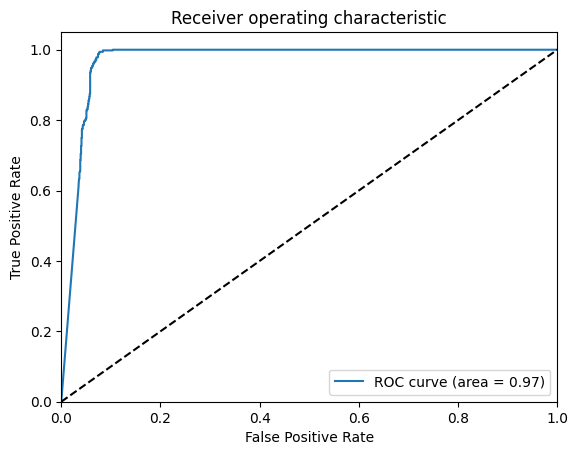

In [ ]:
# Check the model's accuracy of test data and plot the ROC-AUC curve
from sklearn.metrics import roc_curve, auc
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

y_score = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Plot the confusion Matrix

In [ ]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'
from sklearn.metrics import confusion_matrix

# select 5 words of your choice
selected_words = ['to', 'and', 'for', 'of', 'a']

X_test_selected = X_test[X_train.columns]
y_pred = clf.predict(X_test_selected)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[1132   71]
 [  32  472]]


## Trying out with SVMs

In [ ]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

clf = SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.7838312829525483
[[1175   28]
 [ 341  163]]


## Comparing the models

In [ ]:
# Which model performed better? Multinomial native bayes
# Can you suggest some reason for better performance of one model over the other?
# Multinomial Naive Bayes and Support Vector Classifier (SVC) are two different types of classifiers that make different assumptions about the data and use different methods to make predictions.
# The performance of each model can depend on how well their assumptions and methods fit the specific data being used.

## Bonus Question

In [ ]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

In [ ]:
from collections import Counter

s = "I am a Python developer and currently working on a project to classify mails"
words = s.split()
word_counts = Counter(words)

df = pd.DataFrame([word_counts])
print(df)

   I  am  a  Python  developer  and  currently  working  on  project  to  \
0  1   1  2       1          1    1          1        1   1        1   1   

   classify  mails  
0         1      1  
